## Arquivo para trabalho do techchallenge

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
dataset = pd.read_csv('./archive/insurance.csv')
print(dataset.head(10))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


In [82]:
print(dataset.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [83]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [84]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- 67 registros estao faltando em todas as colunas do dataset

## Quais são a frequência dos valores do meu dataset?

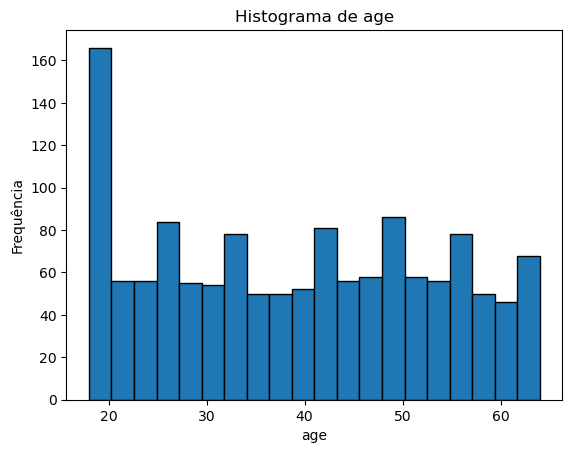

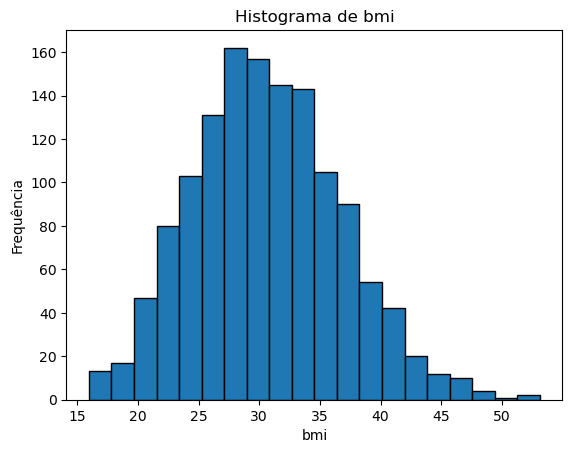

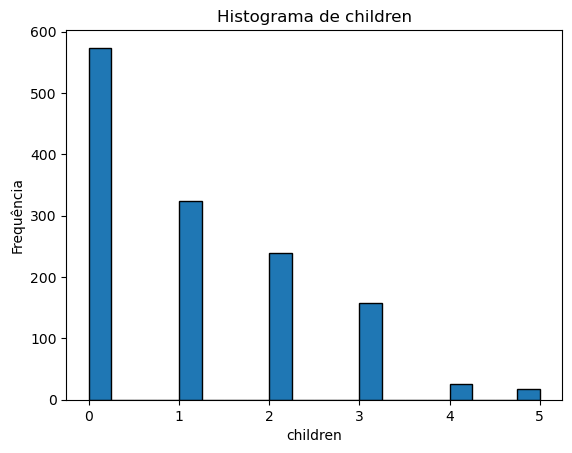

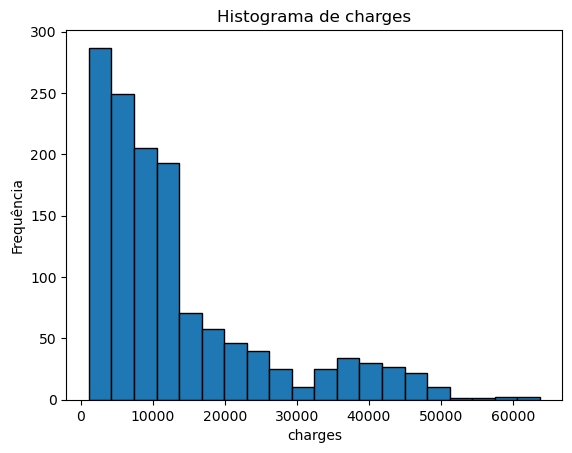

In [86]:
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    plt.hist(dataset[column].dropna(), bins=20, edgecolor='black')  # Drop NaN values para evitar erros
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.show()

In [87]:
dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [98]:
dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [100]:
gender_smoker_counts = dataset.groupby(['sex', 'smoker']).size()
print(gender_smoker_counts)

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
dtype: int64


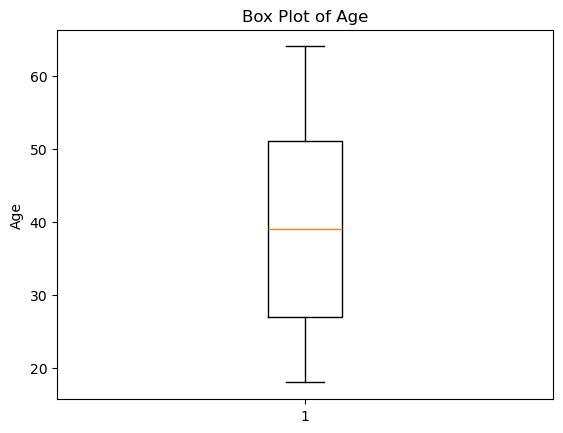

In [88]:
plt.boxplot(dataset['age'].dropna())  # Drop NaN values to avoid errors
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()

In [89]:
min_age = dataset['age'].min()
max_age = dataset['age'].max()

print(f"Menor valor na coluna 'age': {min_age}")
print(f"Maior valor na coluna 'age': {max_age}")

Menor valor na coluna 'age': 18
Maior valor na coluna 'age': 64


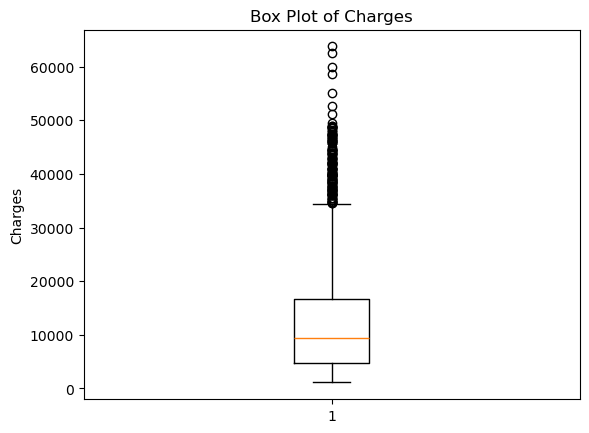

In [90]:
plt.boxplot(dataset['charges'].dropna())  # Drop NaN values to avoid errors
plt.title('Box Plot of Charges')
plt.ylabel('Charges')
plt.show()

Há uma quantidade considerável de outliers na coluna de cobrança que começam próximos ao valor de 40 mil.

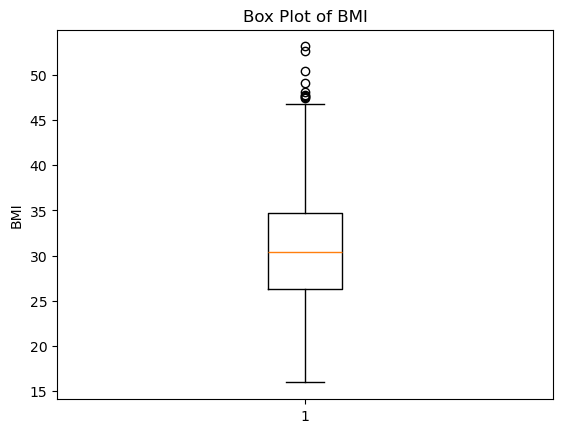

In [101]:
plt.boxplot(dataset['bmi'].dropna())  # Drop NaN values to avoid errors
plt.title('Box Plot of BMI')
plt.ylabel('BMI')
plt.show()

## Qual a variação da cobrança de acordo com a idade?

age_category
18-25     9011.340317
26-35    10352.392526
36-45    13134.168693
46-55    15853.927878
56-64    18037.050766
Name: charges, dtype: float64


C:\Users\thiag\AppData\Local\Temp\ipykernel_50064\1453652552.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_charges_by_age = dataset.groupby('age_category')['charges'].mean()


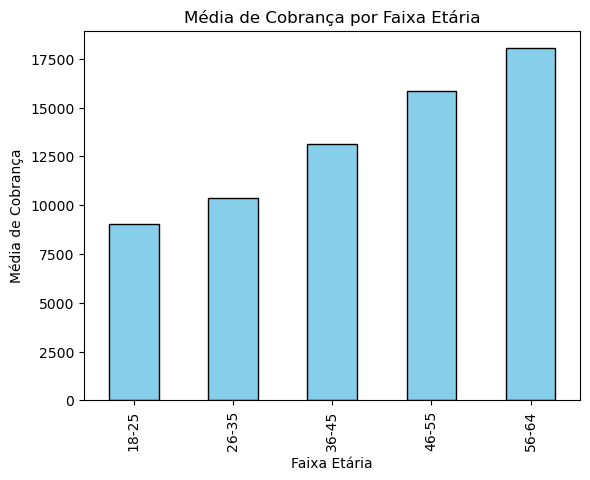

In [91]:
# Criar categorias de idade entre 18 e 64
bins = [18, 25, 35, 45, 55, 64]  # Faixas etárias
labels = ['18-25', '26-35', '36-45', '46-55', '56-64']  # Rótulos para as categorias
dataset['age_category'] = pd.cut(dataset['age'], bins=bins, labels=labels, right=False)

# Calcular a média de cobrança para cada categoria de idade
average_charges_by_age = dataset.groupby('age_category')['charges'].mean()

# Exibir os resultados
print(average_charges_by_age)

# Opcional: Visualizar os resultados com um gráfico de barras
average_charges_by_age.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Média de Cobrança por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Média de Cobrança')
plt.show()

A idade, que varia de 18 a 64 anos, tem uma dependência crescente com o valor do seguro cobrado

## Relação do valor cobrado em relação ao gênero, bmi e quantidade de crianças e se fuma ou não

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64


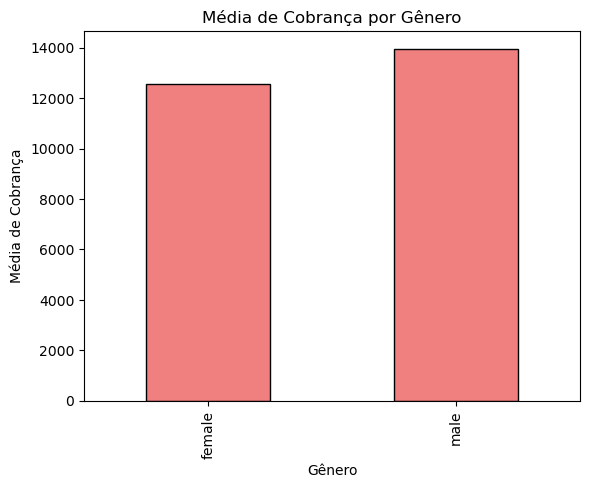

In [92]:
average_charges_by_gender = dataset.groupby('sex')['charges'].mean()

# Exibir os resultados
print(average_charges_by_gender)

# Opcional: Visualizar os resultados com um gráfico de barras
average_charges_by_gender.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Média de Cobrança por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Média de Cobrança')
plt.show()

bmi_category
Abaixo do Peso      8852.200585
Peso Normal        10409.337709
Sobrepeso          10987.509891
Obesidade          15370.294094
Obesidade Grave    16784.615546
Name: charges, dtype: float64


C:\Users\thiag\AppData\Local\Temp\ipykernel_50064\1142152934.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_charges_by_bmi = dataset.groupby('bmi_category')['charges'].mean()


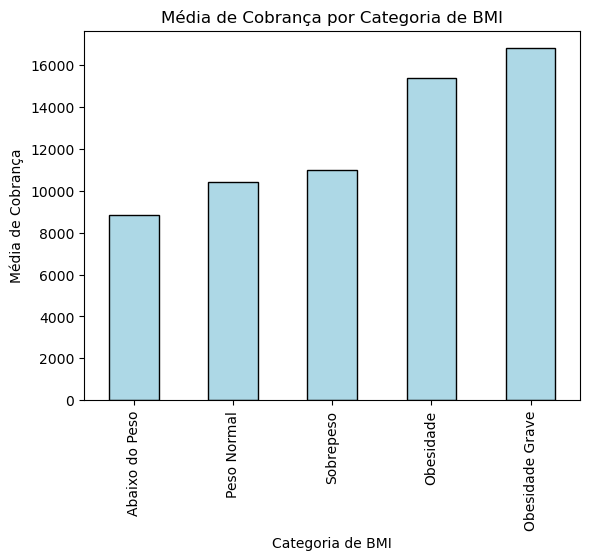

In [93]:
# Criar categorias de BMI
bmi_bins = [0, 18.5, 25, 30, 40, 100]  # Faixas de BMI
bmi_labels = ['Abaixo do Peso', 'Peso Normal', 'Sobrepeso', 'Obesidade', 'Obesidade Grave']
dataset['bmi_category'] = pd.cut(dataset['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

# Calcular a média de cobrança por categoria de BMI
average_charges_by_bmi = dataset.groupby('bmi_category')['charges'].mean()

# Exibir os resultados
print(average_charges_by_bmi)

# Opcional: Visualizar os resultados com um gráfico de barras
average_charges_by_bmi.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Média de Cobrança por Categoria de BMI')
plt.xlabel('Categoria de BMI')
plt.ylabel('Média de Cobrança')
plt.show()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


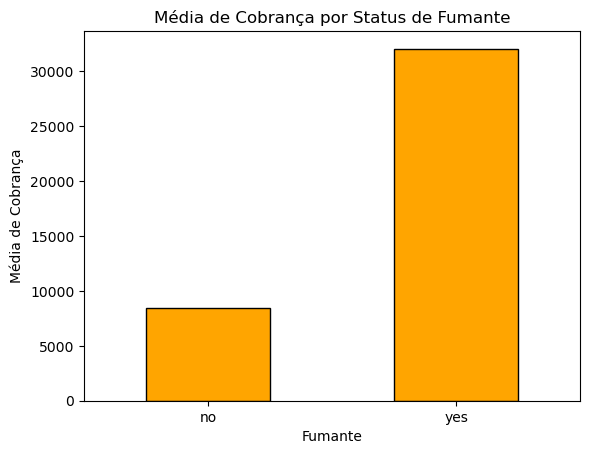

In [94]:
# Calcular a média de cobrança por status de fumante
average_charges_by_smoker = dataset.groupby('smoker')['charges'].mean()

# Exibir os resultados
print(average_charges_by_smoker)

# Opcional: Visualizar os resultados com um gráfico de barras
average_charges_by_smoker.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Média de Cobrança por Status de Fumante')
plt.xlabel('Fumante')
plt.ylabel('Média de Cobrança')
plt.xticks(rotation=0)  # Mantém os rótulos do eixo X legíveis
plt.show()

O valor do seguro é maior para fumantes

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64


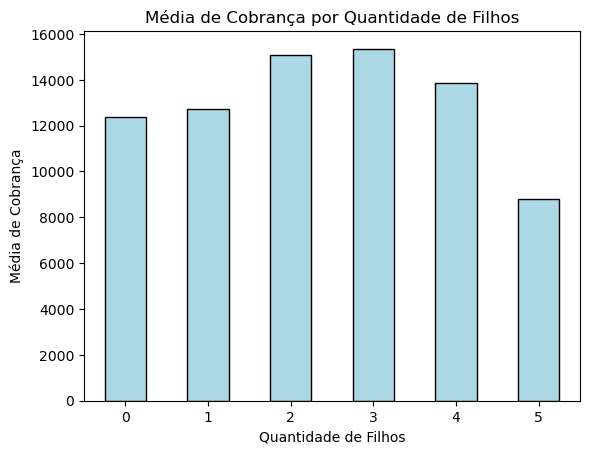

In [96]:
# Calcular a média de cobrança por quantidade de filhos
average_charges_by_children = dataset.groupby('children')['charges'].mean()

# Exibir os resultados
print(average_charges_by_children)

# Visualizar os resultados com um gráfico de barras
average_charges_by_children.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Média de Cobrança por Quantidade de Filhos')
plt.xlabel('Quantidade de Filhos')
plt.ylabel('Média de Cobrança')
plt.xticks(rotation=0)  # Mantém os rótulos do eixo X legíveis
plt.show()

sex     smoker
female  no         8762.297300
        yes       30678.996276
male    no         8087.204731
        yes       33042.005975
Name: charges, dtype: float64


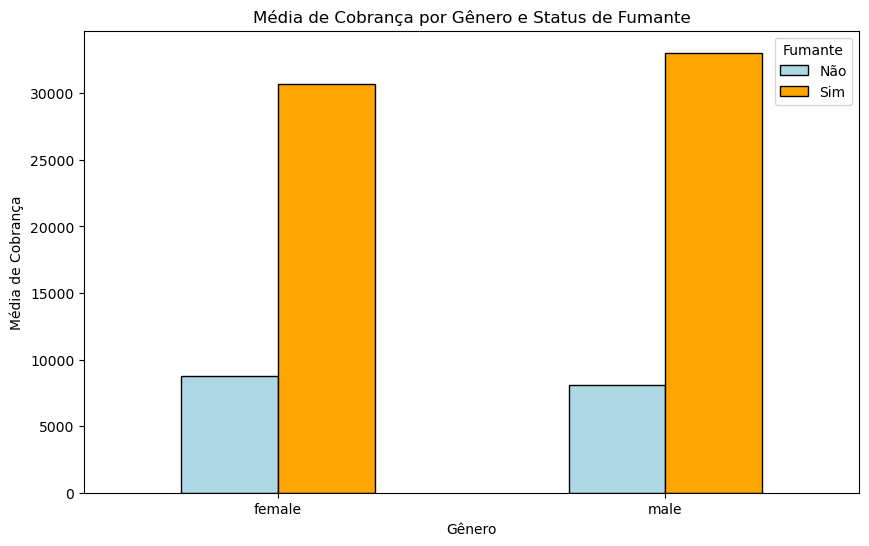

In [102]:
# Calcular a média de cobrança por combinação de gênero e fumantes
average_charges_by_gender_smoker = dataset.groupby(['sex', 'smoker'])['charges'].mean()

# Exibir os resultados
print(average_charges_by_gender_smoker)

# Opcional: Visualizar os resultados com um gráfico de barras
average_charges_by_gender_smoker.unstack().plot(kind='bar', figsize=(10, 6), color=['lightblue', 'orange'], edgecolor='black')
plt.title('Média de Cobrança por Gênero e Status de Fumante')
plt.xlabel('Gênero')
plt.ylabel('Média de Cobrança')
plt.legend(title='Fumante', labels=['Não', 'Sim'])
plt.xticks(rotation=0)  # Mantém os rótulos do eixo X legíveis
plt.show()